## 1. Creating word-based encoding

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Tokenizer can handle the heavy lifting for us, generating the dictionary of word encodings and creating vectors out of the sentences.
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog'    
]
# make a instance of Tokenizer
# the tokenizer will take the top 100 words by volume and just encode these
tokenizer = Tokenizer(num_words = 100)
# takes in the data and encode it 
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


- The tokenizer provides a word index property which returns a dictionary containing key value pairs, where the key is the word, and the value is the token for that word, which you can inspect by simply printing it out.
- The tokenizer strips punctuation(space, comma) out.

## 2. Text to Sequence

Turn your sentences into lists of values based on these tokens.

In [8]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]
# put a special value for unseen word, using oov_token, OOV means outer vocabulary
# You can use whatever you like here, but remember that it should be something unique and distinct that isn't confused with a real word
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

 Let's start with creating a list of sequences, the sentences encoded with the tokens that we generated and I've updated the code that we've been working on to this.

In [9]:
sequences = tokenizer.texts_to_sequences(sentences)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [11]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)
print("\nWord Index = " , word_index)


Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


## 3. Padding

To be uniform in size.

In [15]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
# once yo tokenizer create the sequences, pass these sequences to pad sequances
padded = pad_sequences(sequences, maxlen=5, padding = 'post') padding = 'post' let the padding after the sentences.
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 5  3  2  4  0]
 [ 5  3  2  7  0]
 [ 6  3  2  4  0]
 [ 9  2  4 10 11]]


The sequences have been padded out into a matrix, each row in the matrix have the same length. The martix length will be automatically set to the max length in sequences, for this sequences, is 7. We can overide it using `maxlen` argument. 

Another problems is, the max length is 7, but we set maxlen to be 5. Which part will lose for [8, 6, 9, 2, 4, 10, 11]. The default is pre. You can use truncating parameter.

- padding = 'post': let the padding after the sentences.
- truncating = 'post'

In [18]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=2, truncating = 'post')
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[5 1]
 [2 4]]


## 4. Deal with real world data

In [2]:
import wget
# download our data
wget.download("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json", out="/tmp/sarcasm.json")

'/tmp/sarcasm (1).json'

There element in this dataset:

is_sarcastic is our label. Headline is just plain text. 

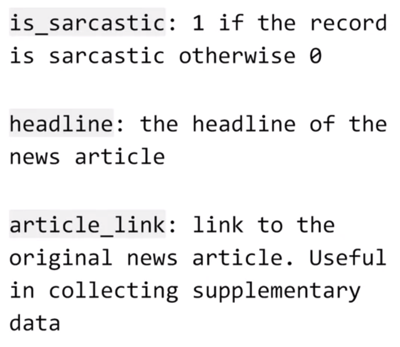

In [3]:
import json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [4]:
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [6]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
# print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)
# we have 26709 sentences, they were encode into padding, and up to 40 words which is the max length

29657
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)
